In [4]:
import pandas as pd


df = pd.read_csv('netflix.csv')

print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


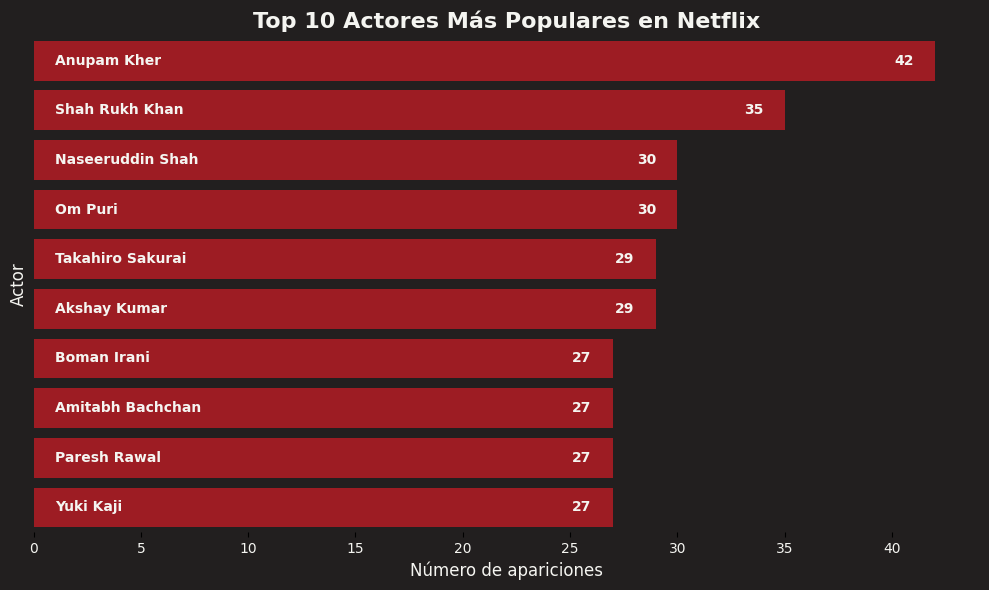

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Separar la columna 'cast' en una lista de actores y limpiar nulos
df['cast'] = df['cast'].fillna('')  # Reemplazar NaN por una cadena vacía
actors = df['cast'].str.split(', ')

# Contar la frecuencia de los actores
actor_list = [actor for sublist in actors for actor in sublist if actor]
actor_counter = Counter(actor_list)
most_common_actors = actor_counter.most_common(10)  # Obtener los 10 actores más populares

# Crear un DataFrame para los actores más populares
actors_df = pd.DataFrame(most_common_actors, columns=['Actor', 'Count'])

blanco = '#f5f5f1'
rojoOscuro = '#b20710'
gris = '#221f1f'

# Configurar el gráfico de barras
plt.figure(figsize=(10,6))
plt.gcf().set_facecolor(gris)  # Fondo de la figura completo
bars = sns.barplot(x='Count', y='Actor', data=actors_df, color=rojoOscuro)

# Personalizar el gráfico
plt.title('Top 10 Actores Más Populares en Netflix', fontsize=16, weight='bold', color=blanco)
plt.xlabel('Número de apariciones', fontsize=12, color=blanco)
plt.ylabel('Actor', fontsize=12, color=blanco)
plt.xticks(color=blanco)
plt.yticks([])
plt.grid(False)
plt.gca().set_facecolor(gris)
# quitar la caja de la gráfica
plt.box(False)

# Añadir el texto dentro de cada barra
for index, value in enumerate(actors_df['Count']):
    bars.text(value - 1, index, f'{value}', color=blanco, va='center', ha='right', fontsize=10, weight='bold')
    # el nombre del actor alineado a la izquierda dentro de la barra (lo estas haciendo mal)
    bars.text(1, index, actors_df['Actor'][index], color=blanco, va='center', ha='left', fontsize=10, weight='bold')
    


# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [6]:
print(actors_df)


              Actor  Count
0       Anupam Kher     42
1    Shah Rukh Khan     35
2  Naseeruddin Shah     30
3           Om Puri     30
4  Takahiro Sakurai     29
5      Akshay Kumar     29
6       Boman Irani     27
7  Amitabh Bachchan     27
8      Paresh Rawal     27
9         Yuki Kaji     27
